<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-признаков" data-toc-modified-id="Распределение-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение признаков</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Матрица корреляций</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Матрица-расстояний" data-toc-modified-id="Матрица-расстояний-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Матрица расстояний</a></span></li><li><span><a href="#Алгоритм-K-mean" data-toc-modified-id="Алгоритм-K-mean-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Алгоритм K-mean</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

**Задача**: провести анализ и подготовить план действий по удержанию клиентов.

**Описание данных**:

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

# Загрузка данных
Откроем файл с таблицей.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# открываем csv-файл
gym = pd.read_csv('/datasets/gym_churn.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# переведём названия колонок в нижний регистр для удобства
gym.columns = gym.columns.str.lower()

# Исследовательский анализ


In [4]:
# основаная информация о таблице
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Датасет содержит 4000 наблюдений, 14 признаков и 1 целевую переменную -факт оттока в текущем месяце. Явных пропусков нет. Посмотрим на распределение признаков.

In [5]:
# основная информация о таблице
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Большинство признаков - бинарные и содержат только факт наличия признака у клиента. Из таких самые частые признаки: проживание или работа в районе с фитнес-центром (почти 85%), наличие контактного телефона (больше 90%). Из небинарных признаков нормально распределены значения возраста клиентов (так как медианное и среднее значение близки) и чреднее количетво посещений зала в неделю. Самый долгий лайфтайм - 31 месяц, но больше всего информации о клиентах, которые пришли в клуб 3 месяца назад.  

Из этой информации можно составить портрет среднестатистического пользователя: 
* **проживание** рядом с фитнес центром
* есть **контактный телефон**
* приобретён **абонемент** на 1 месяц
* не занимается по партнёрской скидке и не по приглашению друга
* **возраст** около 29 лет
* в среднем тратит 150 руб. на **дополнительные покупки**
* сотрудничает с финтес-центром больше 3-х месяцев
* посещает зал 1-2 раза в неделю

В финтес центре занимаются и женщины, и мужчины в равных частях.

In [6]:
# средние значения признаков в разбивке по оттоку
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Пол, наличие контактного телефона и возраст - это признаки, средние значения которых в обеих группах одинаковы. Это значит доли принадлежности к признаку одинаковы как у ушедших, так и у оставшихся клиентов. Скорее всего эти признаки никак не влияют на факт оттока.
Среди оставшихся клиентов больший процент живущих рядом, тех, кто работает в компании-партнёре, тех кто был приглашён другом и тех, кто посещяет групповые тренировки. Средний период контракта, среднее количество посещений в неделю, дополнительных затрат так же больше у тех, кто остался. Средний лайфтайм у ушедших клиентов около 1 месяца, значит чаще всего клиенты уходят именно после месяца. 

## Распределение признаков

In [7]:
# количество уникальных значенийкаждого признака
for col in gym.columns:
    print(col, gym[col].nunique())

gender 2
near_location 2
partner 2
promo_friends 2
phone 2
contract_period 3
group_visits 2
age 23
avg_additional_charges_total 4000
month_to_end_contract 12
lifetime 29
avg_class_frequency_total 3913
avg_class_frequency_current_month 3820
churn 2


Если не считать целевую переменную, что у нас есть 6 бинарных признаков, 4 признака с дискретными величинами и 3 - с непрерывными.

In [8]:
# функция дял построения графика
'''
data - таблица, из которой берутся данные
feature - признак, по которому строится график
hue - признак, по которому разбиваются данные
nbins - количество корзин для построения гистограмы (по умолчанию 10)
'''
def get_plot(data, 
             feature, 
             hue, 
             bins=10):
    plt.figure(figsize=(10, 5))
    
    # для дискретных величин - гистограма
    if data[feature].nunique() > 12:
        for value in data[hue].unique():
            temp = data[data[hue] == value][feature]
            sns.distplot(temp, bins=bins, label=value)
            
    # для непрерывных величин - столбчатая диаграмма
    else:
        sns.barplot(x=feature, y=data.columns[0], data=data,  hue=hue, estimator=len)
    plt.grid()
    plt.title(f'Распределение признака {feature}')
    plt.xlabel('Значение признака')
    plt.ylabel('Количество клиентов')
    plt.legend(title=hue)
    plt.show()

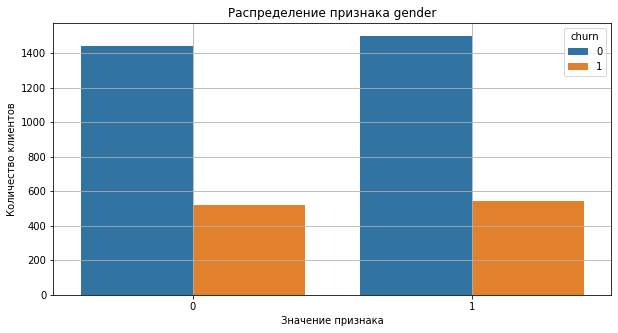

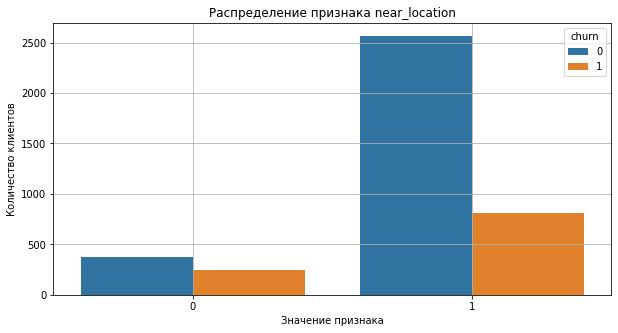

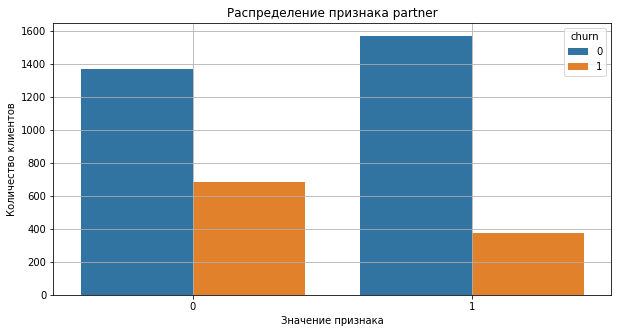

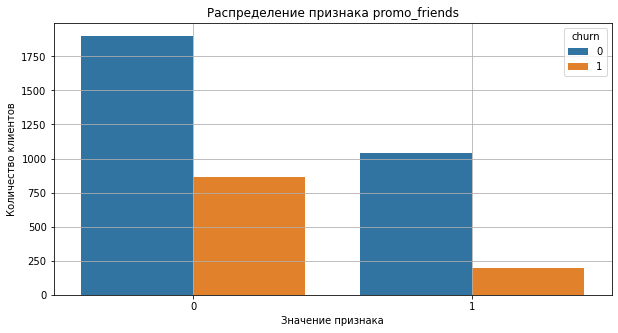

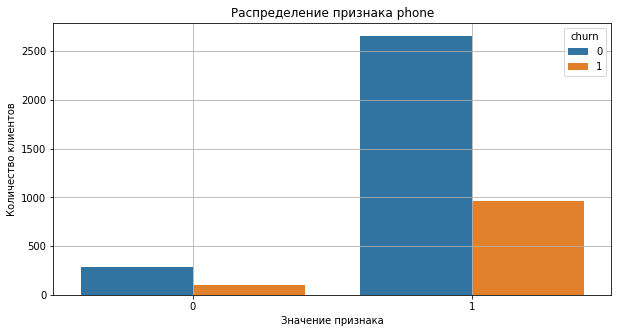

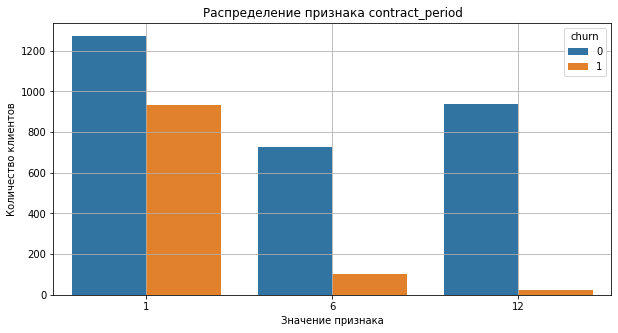

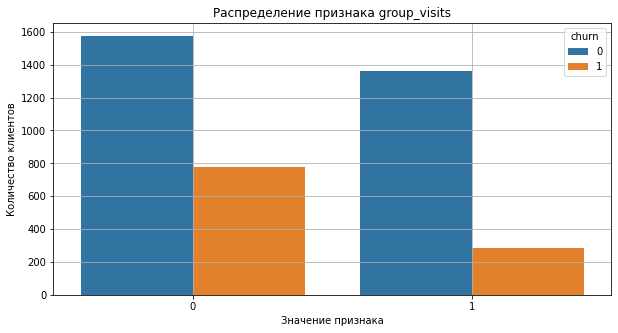

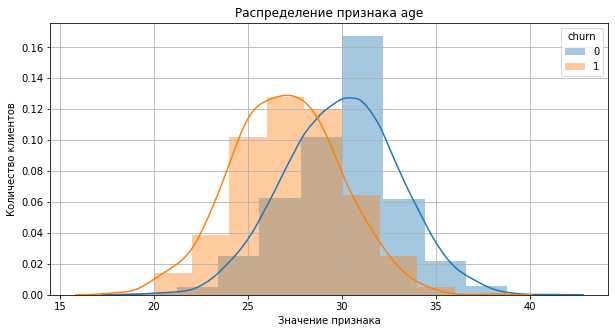

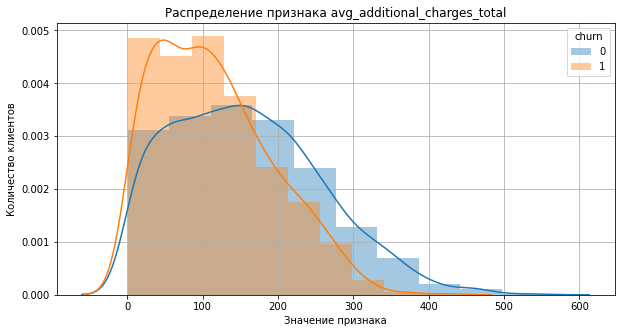

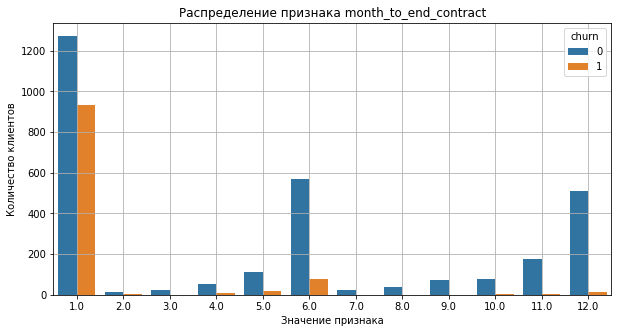

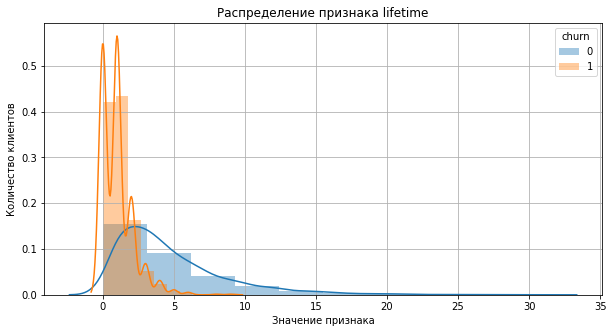

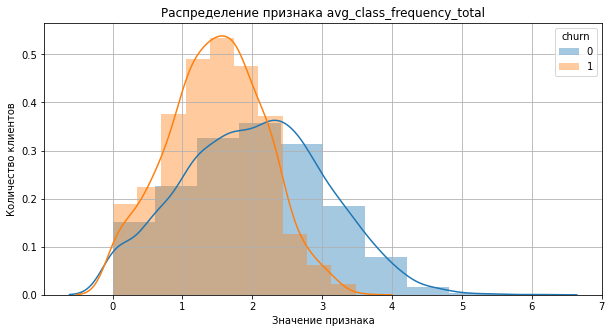

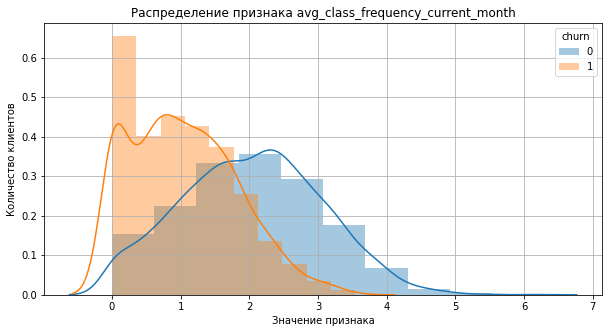

In [9]:
# применяем функцию к каждому признаку
for col in gym.drop('churn', axis=1).columns:
    get_plot(gym, col, 'churn')

По графикам можно сказать то же, что и по таблице, но это более легкий для понимания вариант. Интересным являются несколько графиков. Например, contract_period. Видно, что чем больше срок абонемента, тем реже клиенты уходят. Это логично, ведь обычно люди сначала пробуют услуги, то есть покупают абонемент на месяц, если их всё устраивает и они уверены в том, что продолжат ходить - покупают абонементы на более долгий срок и реже уходят. Поэтому люди чаще всего уходят ещё во время покупки своего парвого абонемента (на месяц). Также можно обратить внимание на график по групповым тренировкам. Клиенты, посещающие их, реще уходят.

По графику оставшихся месяцев до окончания абонемента так же видим большой всплеск у 1 месяца. Почти половина перестала ходить в послединй меяц своего абонемента или же это клиенты, у которых в принципе 1 месяц. Когда же осталось больше 1 месяца, то столько не уходит. Также видны всплески на 6 и 12 месяцах (как раз на столько и выдаются абонементы), не удивительно, что количество пользователей уменьшается, когда истекает срок, ведь они могли уйти ранее. 

По графикам частоты посещения зала в неделю видно, что пользователи, которые ходят чаще в зал - уходят реже.

## Матрица корреляций

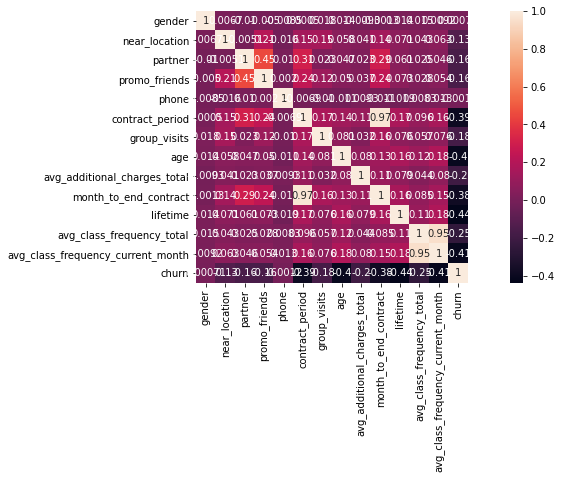

In [10]:
# матрица корреляции
plt.figure(figsize=(15, 5))
sns.heatmap(gym.corr(), annot=True, square=True)
plt.show()

Есть две пары сильно коррелирующих признаков - количетсво месяцев до окончания абонементов и период абонемента, среднее количество посещений в неделю за месяц и за всё время. Можем удалить два признака. Так же признак gender вообще ни с кем не коррелирует, то есть пол не влияет на поведение клиента, тоже можно исключить. То же самое с наличием телефона. 

Сильнее всего с целевой переменной churn коррелирует лайфтайм и среднее количество посещений. Зависимость в основном обратная.

In [11]:
# удаляем ненужные признаки
gym = gym.drop(['gender', 'phone', 'month_to_end_contract', 'avg_class_frequency_total'], axis=1)
gym.head()

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,6,1,29,14.227470,3,0.000000,0
1,1,0,0,12,1,31,113.202938,7,1.910244,0
2,1,1,0,1,0,28,129.448479,2,1.736502,0
3,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,0,26,198.362265,3,1.120078,0


Данные обработаны и подготовлены для дальнейшего анализа.

# Модель прогнозирования оттока клиентов
Построим модель прогнозирования бинарного признака churn - факт оттока клиента в конце месяца. 

In [12]:
# выделим признаки и целевую переменную
X = gym.drop('churn', axis=1)
y = gym['churn']

In [13]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# стандартизируем значения в выборках
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [15]:
# зададим список моделей
models = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(random_state=0)
]

In [16]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

In [17]:
# обучаем модели 
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0, solver='liblinear')
Accuracy: 0.90
Precision: 0.79
Recall: 0.82
RandomForestClassifier(random_state=0)
Accuracy: 0.89
Precision: 0.79
Recall: 0.75


Доля верных ответов выше на 1% у модели логистического регрессора, также выше полнота, то есть модель чаще находит верно клиентов, которые попадут в отток в текущем месяце. 

# Кластеризация клиентов
Стандартизируем таблицу признаков.

In [18]:
# стандартизируем таблицу с признаками
X_st = scaler.transform(X)

## Матрица расстояний

In [19]:
# проводим кластеризацию
linked = linkage(X_st, method = 'ward') 

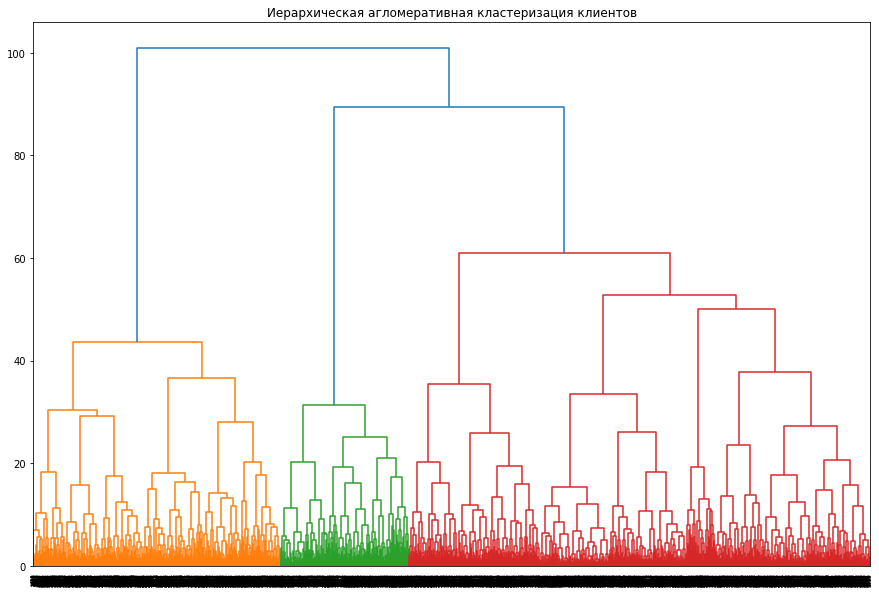

In [20]:
# визуализируем кластеризацию
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая агломеративная кластеризация клиентов')
plt.show() 

Алгоритм выделил 3 основных кластера. Попробуем другой метод для кластеризации.

## Алгоритм K-mean

In [21]:
# обучаем модель
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_st)
gym['cluster_km'] = labels

In [22]:
# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby('cluster_km').mean()

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,
0,0.000000,0.489362,0.075286,2.996727,0.230769,28.680851,137.210096,2.993453,1.596004,0.402619
1,1.000000,0.148096,0.098731,2.720733,1.000000,29.149506,139.809008,2.853315,1.668241,0.275035
2,0.996117,0.944660,1.000000,7.152427,0.513592,29.564078,153.476433,4.237864,1.903128,0.126214
3,1.000000,0.201213,0.074823,1.958544,0.000000,28.176946,133.511397,2.389282,1.414742,0.489383
4,0.993949,0.561271,0.021180,8.564297,0.408472,30.602118,173.512040,6.534039,2.346240,0.009077


Для кластера 0 не характерно проживание рядом с фитнес центром, при этом почти 40% клиентов попадает в отток. 

Для кластера 1 характерно проживание рядом с домом и посещение групповых занятий, при этом 27% пользователей попадает в отток.

Для кластера 2 самой характерной чертой является то, что они приглашены другом в зал, также они являются участниками партнерской программы (возможно коллеги приглашают друг друга заниматься спортом). Так же для таких клиентов характерен достаточно долгий период абонемента. Вообще 2 группа одна из самых надёжных, они и живут рядом.

Для кластера 3, как и для кластера 1, характерно проживание рядом с домом. Однако совсем не характерно посещение групповых занятий. Так же для них характерен короткий срок абонемента. В этом кластере самый высокий процент ухода в отток - почти 48%. Думаю это можно также понять по частоте посещений в неделю - среднее значение минимальное среди кластеров. 

Для кластера 4 характерно близкое проживание и они с большей вероятностью пришли в зал не по приглашению. Такие люди часто ходят в зал, берут долгосрочные абонементы и у них самый долгий средний лайф тайм. Поэтому и в отток уходит минимальный процент - меньше 1%.

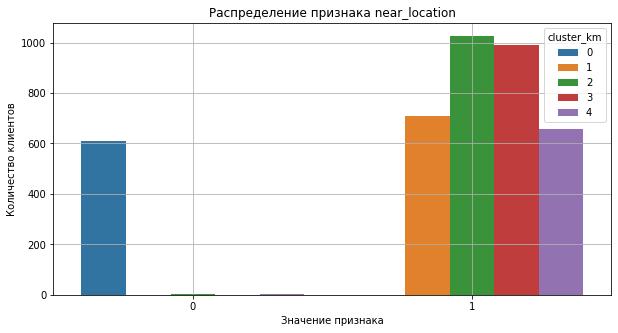

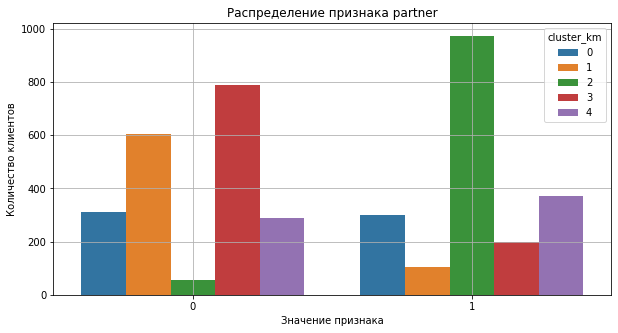

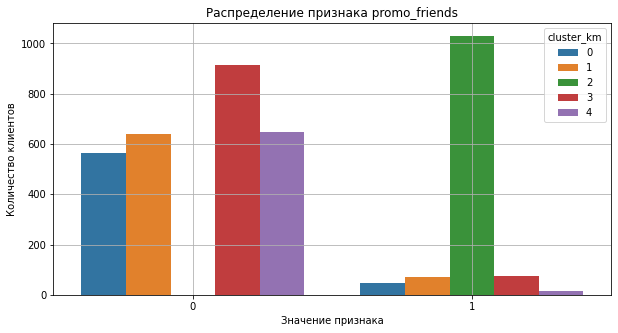

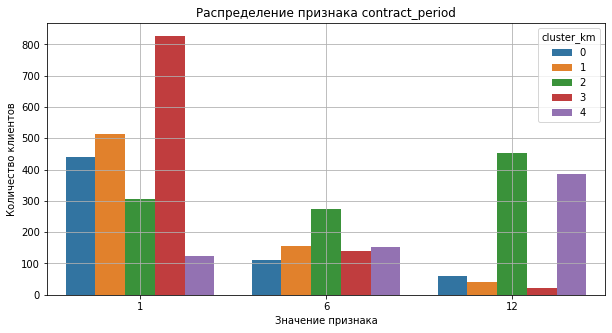

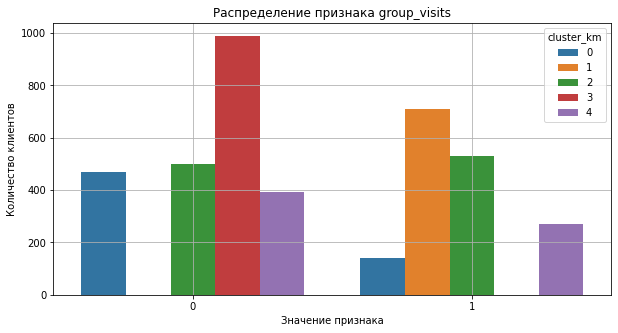

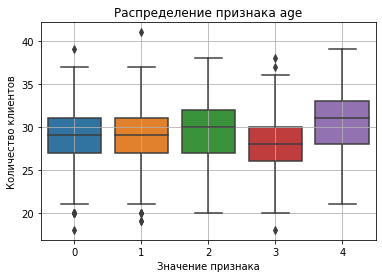

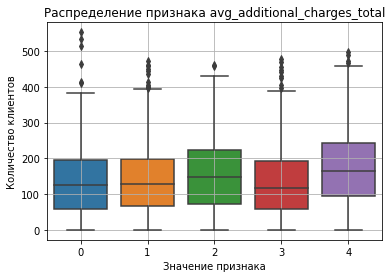

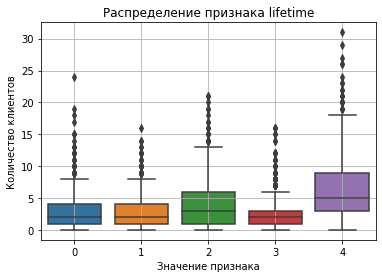

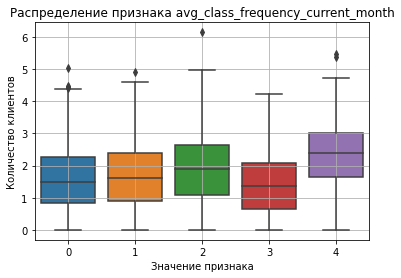

In [31]:
for col in gym.drop(['churn', 'cluster_km'], axis=1).columns:
    if gym[col].nunique() <= 12:
        get_plot(gym, col, 'cluster_km')
    else:
        sns.boxplot(x ='cluster_km', y = col, data = gym)
        plt.grid()
        plt.title(f'Распределение признака {col}')
        plt.xlabel('Значение признака')
        plt.ylabel('Количество клиентов')
        plt.show()

Графики подтверждают выводы выше. На графике для периода абонемента видно, что для 3 группы больше всего характерен абонемент на 1 месяц. Среднийй возраст примерно одинаковый,есть небольшие сдвиги. Например для 4 группы распределение расположено чуть правее, то есть люди более старшего возраста попадают в отток реже. В четвертой группе также меньшая средняя трата на доп. услуги. Лайф тайм "шире" распределен у 4 группы, там больше людей с длительным посещением зала. 3 же кластер чаще не превышает лайфтайм в 6 месяцев. Также самая ситуация и со средним посещением в неделю.

# Вывод

Если две ярко выраженные группы клиентов с разной долей клиентов в оттоке. Для групп, в которой уходят около 40-48% пользователей характерны особенности: 
* большая доля клиентов с коротким лайфтаймом
* большая доля клиентов с месячным абонементом

Скорее всего люди приходят в зал на месяц попробовать заниматься, если им нравится, то они покупают и абонемент на большее количество месяцев, соответственно лайфтайм увеличивается. 

Группу, в которой уходят меньше 1% пользователей, характеризуют:
* большая часть людей, которые пришли не по приглашению друга
* находятся близко к фитнес центру
* чаще остальных почещают зал
* средний возраст выше других групп

Рекомендую больше внимания обращать к людям, которые пришли по приглашению или по партнёрской программе. Многих из них подталкивает идти в зал, например, скидка на абонемент 1 месяц. Поэтому после окончания их ничего не держит в фитнес зале, они попробовали и ушли. Возможно, им стоит порекомендовать ходить на групповые занятия, чтоб они увидели все плюсы групповых тренировок. Так же можно привлекать и удерживать более молодую аудиторию, например, спортивными мероприятиями.

Для прогнозирования рекомендую модель логистического регрессора, так как она чаще находит верно клиентов, попадающих в отток на самом деле. Так обнаружится больше клиентов, на которых нужно обратить особое внимание для их удержания.